In [3]:
#Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                       Version
----------------------------- -----------
anyio                         3.6.1
appnope                       0.1.3
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
attrs                         22.1.0
Babel                         2.10.3
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
beautifulsoup4                4.11.1
bleach                        5.0.1
blis                          0.7.9
brotlipy                      0.7.0
catalogue                     2.0.8
certifi                       2019.11.28
cffi                          1.15.1
charset-normalizer            2.0.4
click                         8.1.5
conda                         4.14.0
conda-package-handling        1.8.1
confection                    0.1.0
cryptography                  37.0.1
cycler                        0.10.0
cymem                         2.0.7
decorator                     5.1.1
defusedxml                    0.7.1
en-cor

# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Ivan Quackenbush

### Repo Link: https://github.com/Quackman21/A6-Web-Scraping-and-NLP-with-Requests-BeautifulSoup-and-spaCy

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [4]:
import requests
import pickle

def extract_article_html(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.text
    else:
        print(f"Failed to fetch the webpage")
        return None

if __name__ == "__main__":
    url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"
    article_html = extract_article_html(url)

    if article_html:
        output_filename = "article_html.pkl"
        with open(output_filename, "wb") as f:
            pickle.dump(article_html, f)
        print(f"Article HTML saved to {output_filename}")

Article HTML saved to article_html.pkl


2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [5]:
import pickle
from bs4 import BeautifulSoup

# Load the HTML content from the pickle file
with open('article_html.pkl', 'rb') as file:
    html_content = pickle.load(file)

# Parse the HTML content
soup = BeautifulSoup(html_content, 'html.parser')

# Extract and print the text using .get_text()
text = soup.get_text()
print(text)

















How Laser Headlights Work | Hackaday






































































Skip to content






Hackaday


Primary Menu

Home
Blog
Hackaday.io
Tindie
Hackaday Prize
Submit
About


Search for:



 March 27, 2021 






How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype l

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [6]:
import pickle
import spacy
from collections import Counter
import string
from spacy.lang.en.stop_words import STOP_WORDS

# Load the article HTML from the pickle file
with open('article_html.pkl', 'rb') as file:
    html_content = pickle.load(file)

# Parse the HTML content using BeautifulSoup to get the plain text
soup = BeautifulSoup(html_content, 'html.parser')
plain_text = soup.get_text()

# Load the spaCy pipeline with the English model
nlp = spacy.load('en_core_web_sm')

# Process the plain text with the spaCy pipeline
doc = nlp(plain_text)

# Define a function to filter out unwanted tokens (punctuation, stopwords, and whitespace)
def is_token_allowed(token):
    return not (token.is_punct or token.is_space or token.lower_ in STOP_WORDS)

# Process the doc and count the frequencies of the allowed tokens
word_freq = Counter(token.text.lower() for token in doc if is_token_allowed(token))

# Get the 5 most common tokens and their frequencies
most_common_tokens = word_freq.most_common(5)

# Print the most common tokens with appropriate labels
print("5 Most Common Tokens:")
for token, frequency in most_common_tokens:
    print(f"Token: '{token}' Frequency: {frequency}")

# Print all tokens and their frequencies with appropriate labels
print("\nAll Tokens and Their Frequencies:")
for token, frequency in word_freq.items():
    print(f"Token: '{token}' Frequency: {frequency}")

    

5 Most Common Tokens:
Token: 'comment' Frequency: 136
Token: 'march' Frequency: 133
Token: '2021' Frequency: 133
Token: 'says' Frequency: 132
Token: 'report' Frequency: 130

All Tokens and Their Frequencies:
Token: 'laser' Frequency: 63
Token: 'headlights' Frequency: 56
Token: 'work' Frequency: 8
Token: '|' Frequency: 4
Token: 'hackaday' Frequency: 15
Token: 'skip' Frequency: 1
Token: 'content' Frequency: 1
Token: 'primary' Frequency: 1
Token: 'menu' Frequency: 1
Token: 'home' Frequency: 6
Token: 'blog' Frequency: 2
Token: 'hackaday.io' Frequency: 3
Token: 'tindie' Frequency: 2
Token: 'prize' Frequency: 3
Token: 'submit' Frequency: 2
Token: 'search' Frequency: 5
Token: 'march' Frequency: 133
Token: '27' Frequency: 5
Token: '2021' Frequency: 133
Token: '130' Frequency: 4
Token: 'comments' Frequency: 21
Token: 'lewin' Frequency: 2
Token: 'day' Frequency: 9
Token: '22' Frequency: 79
Token: 'think' Frequency: 14
Token: 'onward' Frequency: 1
Token: 'automotive' Frequency: 10
Token: 'technol

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [7]:
import pickle
import spacy
from collections import Counter
import string
from spacy.lang.en.stop_words import STOP_WORDS

# Load the article HTML from the pickle file
with open('article_html.pkl', 'rb') as file:
    html_content = pickle.load(file)

# Parse the HTML content using BeautifulSoup to get the plain text
soup = BeautifulSoup(html_content, 'html.parser')
plain_text = soup.get_text()

# Load the spaCy pipeline with the English model
nlp = spacy.load('en_core_web_sm')

# Process the plain text with the spaCy pipeline
doc = nlp(plain_text)

# Define a function to filter out unwanted tokens (punctuation, stopwords, and whitespace)
def is_token_allowed(token):
    return not (token.is_punct or token.is_space or token.lower_ in STOP_WORDS)

# Process the doc and count the frequencies of the allowed lemmas
lemma_freq = Counter(token.lemma_.lower() for token in doc if is_token_allowed(token))

# Get the 5 most common lemmas and their frequencies
most_common_lemmas = lemma_freq.most_common(5)

# Print the most common lemmas with appropriate labels
print("5 Most Common Lemmas:")
for lemma, frequency in most_common_lemmas:
    print(f"Lemmas: '{lemma}' Frequency: {frequency}")

# Print all lemmas and their frequencies with appropriate labels
print("\nAll Lemmas and Their Frequencies:")
for lemma, frequency in lemma_freq.items():
    print(f"Lemmas: '{lemma}' Frequency: {frequency}")


5 Most Common Lemmas:
Lemmas: 'comment' Frequency: 156
Lemmas: 'say' Frequency: 134
Lemmas: 'march' Frequency: 133
Lemmas: '2021' Frequency: 133
Lemmas: 'report' Frequency: 130

All Lemmas and Their Frequencies:
Lemmas: 'laser' Frequency: 72
Lemmas: 'headlights' Frequency: 7
Lemmas: 'work' Frequency: 19
Lemmas: '|' Frequency: 4
Lemmas: 'hackaday' Frequency: 15
Lemmas: 'skip' Frequency: 1
Lemmas: 'content' Frequency: 1
Lemmas: 'primary' Frequency: 1
Lemmas: 'menu' Frequency: 1
Lemmas: 'home' Frequency: 6
Lemmas: 'blog' Frequency: 2
Lemmas: 'hackaday.io' Frequency: 3
Lemmas: 'tindie' Frequency: 2
Lemmas: 'prize' Frequency: 3
Lemmas: 'submit' Frequency: 2
Lemmas: 'search' Frequency: 5
Lemmas: 'march' Frequency: 133
Lemmas: '27' Frequency: 5
Lemmas: '2021' Frequency: 133
Lemmas: '130' Frequency: 4
Lemmas: 'comments' Frequency: 1
Lemmas: 'lewin' Frequency: 2
Lemmas: 'day' Frequency: 11
Lemmas: '22' Frequency: 79
Lemmas: 'think' Frequency: 17
Lemmas: 'onward' Frequency: 1
Lemmas: 'automotive

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [8]:
import spacy
import string

# defining the method used to find the total words in a sentence string
def count_words_using_split(sentence):
    words = sentence.split(' ')
    words = [word for word in words if word.strip(string.punctuation)]
    return len(words)

def score_sentence_by_token(sentence, interesting_tokens):
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(sentence)
    interesting_token_count = sum([1 for token in doc if token.text.lower() in interesting_tokens])

    score = interesting_token_count / count_words_using_split(sentence) if count_words_using_split(sentence) > 0 else 0.0

    return score

def score_sentence_by_lemma(sentence, interesting_lemmas):
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(sentence)
    interesting_lemma_count = sum([1 for token in doc if token.lemma_.lower() in interesting_lemmas])

    score = interesting_lemma_count / count_words_using_split(sentence) if count_words_using_split(sentence) > 0 else 0.0

    return score

# Assuming you have the most common tokens and lemmas from question 3 as follows:
most_common_tokens = ['when', 'think', 'about', 'of', 'automotive']
most_common_lemmas = ['think', 'about', 'onward', 'march', 'automotive']

sentence1 = 'When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.'

# Using the most common tokens and lemmas from question 3 to test the scores
score_token = score_sentence_by_token(sentence1, most_common_tokens)
score_lemma = score_sentence_by_lemma(sentence1, most_common_lemmas)

print(f"Score by Token: {score_token:.2f}")
print(f"Score by Lemma: {score_lemma:.2f}")


Score by Token: 0.25
Score by Lemma: 0.25


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

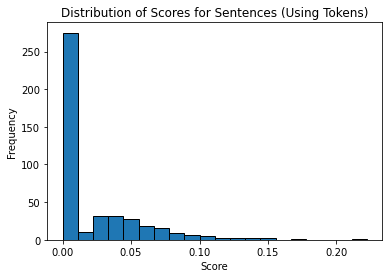

In [14]:
import matplotlib
import pickle
import spacy
import string
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS
import matplotlib.pyplot as plt

# Load the article HTML from the pickle file
with open('article_html.pkl', 'rb') as file:
    html_content = pickle.load(file)

# Parse the HTML content using BeautifulSoup to get the plain text
soup = BeautifulSoup(html_content, 'html.parser')
plain_text = soup.get_text()

# Split the plain text into individual sentences
sentences = plain_text.split('.')

# Load the spaCy pipeline with the English model
nlp = spacy.load('en_core_web_sm')

# Define a function to filter out unwanted tokens (punctuation, stopwords, and whitespace)
def is_token_allowed(token):
    return not (token.is_punct or token.is_space or token.lower_ in STOP_WORDS)

# Define the most common tokens from question 3 (use your own most_common_tokens)
most_common_tokens = ['when', 'think', 'about', 'of', 'automotive']

# Create a list to store the scores of each sentence
sentence_scores = []

# Calculate scores for each sentence using tokens and append to the list
for sentence in sentences:
    score = score_sentence_by_token(sentence, most_common_tokens)
    sentence_scores.append(score)

# Plotting the histogram
plt.hist(sentence_scores, bins=20, edgecolor='black')
plt.title('Distribution of Scores for Sentences (Using Tokens)')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()



7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

Text(0.5, 0, 'Score')

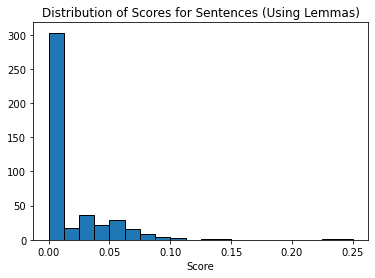

In [16]:
import pickle
import spacy
import string
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS
import matplotlib.pyplot as plt

# Load the article HTML from the pickle file
with open('article_html.pkl', 'rb') as file:
    html_content = pickle.load(file)

# Parse the HTML content using BeautifulSoup to get the plain text
soup = BeautifulSoup(html_content, 'html.parser')
plain_text = soup.get_text()

# Split the plain text into individual sentences
sentences = plain_text.split('.')

# Load the spaCy pipeline with the English model
nlp = spacy.load('en_core_web_sm')

# Define a function to filter out unwanted tokens (punctuation, stopwords, and whitespace)
def is_token_allowed(token):
    return not (token.is_punct or token.is_space or token.lower_ in STOP_WORDS)

# Define the most common lemmas from question 3 (use your own most_common_lemmas)
most_common_lemmas = ['think', 'about', 'onward', 'march', 'automotive']

# Create a list to store the scores of each sentence using lemmas
sentence_scores_by_lemma = []

# Calculate scores for each sentence using lemmas and append to the list
for sentence in sentences:
    score = score_sentence_by_lemma(sentence, most_common_lemmas)
    sentence_scores_by_lemma.append(score)

# Plotting the histogram
plt.hist(sentence_scores_by_lemma, bins=20, edgecolor='black')
plt.title('Distribution of Scores for Sentences (Using Lemmas)')
plt.xlabel('Score')

#The most common scores are between 0.00 and 0.10

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

The tokens and lexems that would be ommitted from the lists generated would be words like verbs and adjectives. One way that you could go about changing the code to make it happen is by teaching the machine what a noun is. You do this by setting the perameter of what a noun is and teaching it what kidns of words to ommit. Additionally you have to toeknize the words to make sure that they show up uniformly. This should make it easy for the machine to go through the article and list the nouns.